In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
%matplotlib inline

In [7]:
#import csv
#2jau and 5e3j are low-high and high-low
df1 = pd.read_csv('data_exp_6138-v31_task-2jau.csv', sep = ",")
df2 = pd.read_csv('data_exp_6138-v31_task-5e3j.csv', sep = ",")
df1.head(1)

Event Index  UTC Timestamp             UTC Date  Local Timestamp  \
0           1   1.551894e+12  06/03/2019 17:39:03     1.551894e+12   

   Local Timezone           Local Date  Experiment ID  Experiment Version  \
0             0.0  06/03/2019 17:39:03         6138.0                31.0   

  Tree Node Key  Repeat Key  Schedule ID     Participant Public ID  \
0     task-2jau         NaN    2280330.0  5c0e55c7427e7b00013b7cb0   

   Participant Private ID  Participant Starting Group Participant Status  \
0                621711.0                         NaN           complete   

   Participant Completion Code Participant External Session ID  \
0                          NaN        5c8003740fa63e001663059f   

  Participant Device Type Participant Device Participant OS  \
0                computer  Desktop or Laptop     Windows 10   

    Participant Browser Participant Monitor Size Participant Viewport Size  \
0  Chrome 72.0.3626.121                 1280x720                  1280x578   

            Checkpoint             Task Name  Task Version randomiser-mgaa  \
0  after questionnairs  High to Low with rod          10.0     High to Low   

  checkpoint-z52s     checkpoint-u6nu checkpoint-puaw checkpoint-axcr  \
0   after consent  after demographics  after training   after fishing   

       checkpoint-mrc4  reaction time  key pressed  price_displayed     order  \
0  after questionnairs         7893.0         32.0              NaN  high-low   

  environment  round instance task  function id  rod fixing checked  \
0        high             NaN  NaN  instruction                 NaN   

   builtin rt      end_time    start_time  
0     7892.48  1.551894e+12  1.551894e+12

In [8]:
#get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#replace all null and nan to the np.nan
df1 = df1.replace('null', np.nan)
df1 = df1.replace('nan', np.nan)
df2 = df2.replace('null', np.nan)
df2 = df2.replace('nan', np.nan)

#turn object into floats and round them and rename them
df1['end_time'] = round(df1['end_time'].astype(float))
df1['start_time'] = round(df1['start_time'].astype(float))
df1['builtin_rt'] = df1['builtin rt'].astype(float) #dont round up builtin reaction time
df1['quality_check'] = df1['rod fixing checked'].astype(float)
df1['id'] = df1['Participant Private ID']
df1['function_id'] = df1['function id']
df1['round_instance'] = df1['round instance']
df2['end_time'] = round(df2['end_time'].astype(float))
df2['start_time'] = round(df2['start_time'].astype(float))
#df2['builtin_rt'] = df2['builtin rt'].astype(float) #dont round up builtin reaction time
df2['quality_check'] = df2['rod fixing checked'].astype(float)
df2['id'] = df2['Participant Private ID']
df2['round_instance'] = df2['round_instance']
df2['function_id'] = df2['function id']

In [9]:
#look at the unabridged version of the dataframe
#pd.set_option('display.max_columns', 300)
#pd.set_option('display.max_rows', None)


In [10]:
#select columns from df1 and df2

data1 = df1[['id','price_displayed', 'key pressed','environment', 'order', 
           'round_instance', 'task', 'function_id', 'quality_check', 
           'builtin_rt', 'end_time', 'start_time', 'Participant Public ID']]
data2 = df2[['id','price_displayed', 'key pressed','environment', 'order', 
           'round_instance', 'task', 'function_id', 'quality_check', 
           'builtin_rt', 'end_time', 'start_time', 'Participant Public ID']]

In [11]:
#append two csv files into one
#dont append all the columns in two files --> way too big and no real meaning
data = data1.append(data2)

In [37]:
#pd.set_option('display.max_columns', 300)
#pd.set_option('display.max_rows', None)
#data.sort_values(by = ['id'])
#data.head(10000)
data.index.nunique()
index_manual = list(range(0, len(data)))
data['index'] = index_manual
#data = data.set_index('index')
#data.head(100)

In [38]:
#get rid of all data collected from caller function
#caller functions were used to initilized elements - dont have real meaning to us
data = data[data.function_id != 'caller']
data = data[pd.notnull(data['function_id'])]

In [39]:
def latency(ser):
    """ takes in a series and turn into a list
    then calculate latency
    the same function in pandas is called np.diff()
    """
    lst = ser.tolist()
    i = 0
    latency_s = []
    while i < len(lst)-1:
        if lst[i] != np.nan:
            t = lst[i+1] - lst[i]
            latency_s.append(t)
            i = i + 1
        else:
            latency_s.append(np.nan)
    latency_s.append(0)
    return latency_s

In [40]:
#take a look at rod fixing data
data_rod = data[data.function_id == "rod_fixing"]


In [41]:
#do a data quality check
def quality_check(lst):
    check = lst.tolist()
    if 0 in check:
        return True
    else:
        return False
quality_check(data_rod['quality_check'])
# false - they all fixed their rods

data_rod.head(10000)

id  price_displayed  key pressed environment     order  \
index                                                                   
175    621711.000              nan       39.000        high  high-low   
176    621711.000              nan       39.000        high  high-low   
177    621711.000              nan       39.000        high  high-low   
178    621711.000              nan       39.000        high  high-low   
179    621711.000              nan       39.000        high  high-low   
180    621711.000              nan       39.000        high  high-low   
181    621711.000              nan       39.000        high  high-low   
182    621711.000              nan       39.000        high  high-low   
504    621711.000              nan       39.000        high  high-low   
505    621711.000              nan       39.000        high  high-low   
506    621711.000              nan       39.000        high  high-low   
507    621711.000              nan       39.000        high  high-low   
508    621711.000              nan       39.000        high  high-low   
509    621711.000              nan       39.000        high  high-low   
510    621711.000              nan       39.000        high  high-low   
511    621711.000              nan       39.000        high  high-low   
830    621711.000              nan       39.000        high  high-low   
831    621711.000              nan       39.000        high  high-low   
832    621711.000              nan       39.000        high  high-low   
833    621711.000              nan       39.000        high  high-low   
834    621711.000              nan       39.000        high  high-low   
835    621711.000              nan       39.000        high  high-low   
836    621711.000              nan       39.000        high  high-low   
837    621711.000              nan       39.000        high  high-low   
1242   621711.000              nan       39.000        high  high-low   
1243   621711.000              nan       39.000        high  high-low   
1244   621711.000              nan       39.000        high  high-low   
1245   621711.000              nan       39.000        high  high-low   
1246   621711.000              nan       39.000        high  high-low   
1247   621711.000              nan       39.000        high  high-low   
1248   621711.000              nan       39.000        high  high-low   
1249   621711.000              nan       39.000        high  high-low   
1577   621711.000              nan       39.000        high  high-low   
1578   621711.000              nan       39.000        high  high-low   
1579   621711.000              nan       39.000        high  high-low   
1580   621711.000              nan       39.000        high  high-low   
1581   621711.000              nan       39.000        high  high-low   
1582   621711.000              nan       39.000        high  high-low   
1583   621711.000              nan       39.000        high  high-low   
1584   621711.000              nan       39.000        high  high-low   
1788   621711.000              nan       39.000        high  high-low   
1789   621711.000              nan       39.000        high  high-low   
1790   621711.000              nan       39.000        high  high-low   
1791   621711.000              nan       39.000        high  high-low   
1792   621711.000              nan       39.000        high  high-low   
1793   621711.000              nan       39.000        high  high-low   
1794   621711.000              nan       39.000        high  high-low   
1795   621711.000              nan       39.000        high  high-low   
2097   621711.000              nan       39.000         low  high-low   
2098   621711.000              nan       39.000         low  high-low   
2099   621711.000              nan       39.000         low  high-low   
2100   621711.000              nan       39.000         low  high-low   
2101   621711.000              nan       39.000         low  high-low   


In [42]:
data_rod.groupby('round_instance')['id'].size()
# this set of numbers do not look right

round_instance
11.000    702
12.000    765
21.000    722
22.000    695
Name: id, dtype: int64

In [43]:
rod_count = data_rod.groupby('id')['start_time'].size().reset_index(name = 'count')
rod_count.head(100)
# should be 96 if subjects responded to all rod fixing
# cannot be over 96 -- control for internet speed next round?

id  count
0  621711.000     91
1  621725.000     84
2  621729.000     83
3  621733.000     94
4  621734.000     92
5  621735.000     79
6  621738.000     88
7  621749.000     92
8  621753.000     94
9  621759.000     95
10 621761.000     92
11 621762.000     87
12 621770.000     90
13 621772.000     97
14 621774.000    101
15 621775.000     94
16 621785.000     89
17 621789.000     85
18 625385.000     86
19 625386.000     96
20 625389.000     90
21 625392.000     86
22 625394.000     92
23 625395.000    110
24 625403.000     75
25 625404.000     85
26 625406.000     83
27 625408.000     84
28 625410.000    113
29 625411.000     84
30 625416.000     79
31 625431.000     94

In [44]:
# take one closer look at subject 621774
data_rod[data_rod.id == 621774.000]

id  price_displayed  key pressed environment     order  \
index                                                                  
24613 621774.000              nan       40.000        high  high-low   
24614 621774.000              nan       40.000        high  high-low   
24615 621774.000              nan          nan        high  high-low   
24616 621774.000              nan          nan        high  high-low   
24617 621774.000              nan          nan        high  high-low   
24618 621774.000              nan       39.000        high  high-low   
24619 621774.000              nan       39.000        high  high-low   
24620 621774.000              nan       39.000        high  high-low   
24621 621774.000              nan       39.000        high  high-low   
24622 621774.000              nan       39.000        high  high-low   
24623 621774.000              nan       39.000        high  high-low   
24624 621774.000              nan       39.000        high  high-low   
24625 621774.000              nan       39.000        high  high-low   
24961 621774.000              nan       39.000        high  high-low   
24962 621774.000              nan       39.000        high  high-low   
24963 621774.000              nan       39.000        high  high-low   
24964 621774.000              nan       39.000        high  high-low   
24965 621774.000              nan       39.000        high  high-low   
24966 621774.000              nan       39.000        high  high-low   
24967 621774.000              nan       39.000        high  high-low   
24968 621774.000              nan       39.000        high  high-low   
25287 621774.000              nan       39.000        high  high-low   
25288 621774.000              nan       39.000        high  high-low   
25289 621774.000              nan       39.000        high  high-low   
25290 621774.000              nan       39.000        high  high-low   
25291 621774.000              nan       39.000        high  high-low   
25292 621774.000              nan       39.000        high  high-low   
25293 621774.000              nan       39.000        high  high-low   
25294 621774.000              nan       39.000        high  high-low   
25692 621774.000              nan       39.000        high  high-low   
25693 621774.000              nan       39.000        high  high-low   
25694 621774.000              nan       39.000        high  high-low   
25695 621774.000              nan       39.000        high  high-low   
25696 621774.000              nan       39.000        high  high-low   
25697 621774.000              nan       39.000        high  high-low   
25698 621774.000              nan       39.000        high  high-low   
25699 621774.000              nan       39.000        high  high-low   
26025 621774.000              nan       39.000        high  high-low   
26026 621774.000              nan       39.000        high  high-low   
26027 621774.000              nan       39.000        high  high-low   
26028 621774.000              nan       39.000        high  high-low   
26029 621774.000              nan       39.000        high  high-low   
26030 621774.000              nan       39.000        high  high-low   
26031 621774.000              nan       39.000        high  high-low   
26032 621774.000              nan       39.000        high  high-low   
26275 621774.000              nan       39.000        high  high-low   
26276 621774.000              nan       39.000        high  high-low   
26277 621774.000              nan       39.000        high  high-low   
26278 621774.000              nan       39.000        high  high-low   
26279 621774.000              nan       39.000        high  high-low   
26280 621774.000              nan       39.000        high  high-low   
26281 621774.000              nan       39.000        high  high-low   
26282 621774.000              nan       39.000        high  high-low   
26592 621774.000              nan       39.000        

In [45]:
data_rod[data_rod.id == 621729.000].groupby('round_instance').size()
# for each round, there should be 18 taps

round_instance
11.000    14
12.000    29
21.000    21
22.000    19
dtype: int64

In [46]:
# get the id and start time columns of the rod fixing data
rod_group = data_rod[['id', 'start_time']]
# sort values by id and start time. this is crucial for groupby
# basically you want those with the same id to be next to each other and for each participants the start time to 
# be ordered
#uncomment this
#rod_group = rod_group.sort_values(by = ['id', 'start_time'])
rod_group.head(1000)


id        start_time
index                             
175   621711.000 1551893991468.000
176   621711.000 1551893992389.000
177   621711.000 1551893992527.000
178   621711.000 1551893992669.000
179   621711.000 1551893992792.000
180   621711.000 1551893992933.000
181   621711.000 1551893993068.000
182   621711.000 1551893993202.000
504   621711.000 1551894043746.000
505   621711.000 1551894044599.000
506   621711.000 1551894044861.000
507   621711.000 1551894045000.000
508   621711.000 1551894045123.000
509   621711.000 1551894045241.000
510   621711.000 1551894045386.000
511   621711.000 1551894045544.000
830   621711.000 1551894096015.000
831   621711.000 1551894096750.000
832   621711.000 1551894096896.000
833   621711.000 1551894097034.000
834   621711.000 1551894097178.000
835   621711.000 1551894097316.000
836   621711.000 1551894097455.000
837   621711.000 1551894097765.000
1242  621711.000 1551894186663.000
1243  621711.000 1551894187361.000
1244  621711.000 1551894187515.000
1245  621711.000 1551894187659.000
1246  621711.000 1551894187798.000
1247  621711.000 1551894187921.000
1248  621711.000 1551894188048.000
1249  621711.000 1551894188190.000
1577  621711.000 1551894238898.000
1578  621711.000 1551894240028.000
1579  621711.000 1551894240159.000
1580  621711.000 1551894240279.000
1581  621711.000 1551894240404.000
1582  621711.000 1551894240545.000
1583  621711.000 1551894240674.000
1584  621711.000 1551894240810.000
1788  621711.000 1551894278052.000
1789  621711.000 1551894278745.000
1790  621711.000 1551894278877.000
1791  621711.000 1551894278999.000
1792  621711.000 1551894279141.000
1793  621711.000 1551894279264.000
1794  621711.000 1551894279394.000
1795  621711.000 1551894279545.000
2097  621711.000 1551894404708.000
2098  621711.000 1551894405457.000
2099  621711.000 1551894405626.000
2100  621711.000 1551894405777.000
2101  621711.000 1551894405908.000
2102  621711.000 1551894406037.000
2103  621711.000 1551894406185.000
2104  621711.000 1551894406328.000
2394  621711.000 1551894457081.000
2395  621711.000 1551894458046.000
2396  621711.000 1551894458155.000
2397  621711.000 1551894458281.000
2398  621711.000 1551894458410.000
2640  621711.000 1551894509402.000
2641  621711.000 1551894510284.000
2642  621711.000 1551894510434.000
2643  621711.000 1551894510555.000
2644  621711.000 1551894510690.000
2645  621711.000 1551894510802.000
2646  621711.000 1551894510920.000
2647  621711.000 1551894511033.000
2981  621711.000 1551894577995.000
2982  621711.000 1551894578706.000
2983  621711.000 1551894578816.000
2984  621711.000 1551894578961.000
2985  621711.000 1551894579079.000
2986  621711.000 1551894579194.000
2987  621711.000 1551894579312.000
3293  621711.000 1551894630227.000
3294  621711.000 1551894630806.000
3295  621711.000 1551894630930.000
3296  621711.000 1551894631055.000
3297  621711.000 1551894631180.000
3298  621711.000 1551894631324.000
3299  621711.000 1551894631467.000
3300  621711.000 1551894631617.000
3499  621711.000 1551894669417.000
3500  621711.000 1551894670227.000
3501  621711.000 1551894670334.000
3502  621711.000 1551894670463.000
3503  621711.000 1551894670592.000
3504  621711.000 1551894670714.000
3505  621711.000 1551894670839.000
54841 621725.000 1551894191511.000
54842 621725.000 1551894192358.000
54843 621725.000 1551894192451.000
54844 621725.000 1551894192579.000
54845 621725.000 1551894192700.000
54846 621725.000 1551894192813.000
54847 621725.000 1551894192939.000
54848 621725.000 1551894193069.000
55175 621725.000 1551894243813.000
55176 621725.000 1551894244560.000
55177 621725.000 1551894244691.000
55178 621725.000 1551894244823.000
55179 621725.000 1551894244967.000
55180 621725.000 1551894245109.000
55181 621725.000 1551894245237.000
55182 621725.000 1551894245392.000
55504 621725.000 1551894296060.000
55508 621725.000 1551894296265.000
55509 621725.000 1551894296825.000
55510 621725.000 1551894296946.000
55511 621725.000 1551894297088.000
55512 621725.000 1551894

In [47]:
# construct a temporary data frame named a
# first groupby id; call diff() to the start_time column of each id
# uncomment this line to run the code
# a = rod_group.groupby('id', as_index = True)['start_time'].diff().shift(-1).reset_index(name = 'latency')
a = a.set_index('index')
a.head(100000)

latency
index            
175       921.000
176       138.000
177       142.000
178       123.000
179       141.000
180       135.000
181       134.000
182     50544.000
504       853.000
505       262.000
506       139.000
507       123.000
508       118.000
509       145.000
510       158.000
511     50471.000
830       735.000
831       146.000
832       138.000
833       144.000
834       138.000
835       139.000
836       310.000
837     88898.000
1242      698.000
1243      154.000
1244      144.000
1245      139.000
1246      123.000
1247      127.000
1248      142.000
1249    50708.000
1577     1130.000
1578      131.000
1579      120.000
1580      125.000
1581      141.000
1582      129.000
1583      136.000
1584    37242.000
1788      693.000
1789      132.000
1790      122.000
1791      142.000
1792      123.000
1793      130.000
1794      151.000
1795   125163.000
2097      749.000
2098      169.000
2099      151.000
2100      131.000
2101      129.000
2102      148.000
2103      143.000
2104    50753.000
2394      965.000
2395      109.000
2396      126.000
2397      129.000
2398    50992.000
2640      882.000
2641      150.000
2642      121.000
2643      135.000
2644      112.000
2645      118.000
2646      113.000
2647    66962.000
2981      711.000
2982      110.000
2983      145.000
2984      118.000
2985      115.000
2986      118.000
2987    50915.000
3293      579.000
3294      124.000
3295      125.000
3296      125.000
3297      144.000
3298      143.000
3299      150.000
3300    37800.000
3499      810.000
3500      107.000
3501      129.000
3502      129.000
3503      122.000
3504      125.000
3505          nan
54841     847.000
54842      93.000
54843     128.000
54844     121.000
54845     113.000
54846     126.000
54847     130.000
54848   50744.000
55175     747.000
55176     131.000
55177     132.000
55178     144.000
55179     142.000
55180     128.000
55181     155.000
55182   50668.000
55504     205.000
55508     560.000
55509     121.000
55510     142.000
55511     137.000
55512     150.000
55513     126.000
55514     147.000
55515   77358.000
55952    1099.000
55953     126.000
55954     127.000
55955     131.000
55956     142.000
55957     130.000
55958     143.000
55959   50470.000
56283     600.000
56284     139.000
56285     146.000
56286     139.000
56287     117.000
56288     167.000
56289     142.000
56290   37833.000
56524     833.000
56525     122.000
56526     144.000
56527     107.000
56528     132.000
56529     163.000
56530     147.000
56531  101693.000
56857     574.000
56858     134.000
56859     124.000
56860     121.000
56861     127.000
56862   51321.000
57215    1092.000
57216     128.000
57217     136.000
57218     136.000
57219     169.000
57220     154.000
57221   50491.000
57533     748.000
57534     117.000
57535     136.000
57536     135.000
57537     132.000
57538     144.000
57539     135.000
57540   96031.000
57956     752.000
57957   51501.000
58286     784.000
58287   38545.000
58526    1022.000
58527     127.000
58528     127.000
58529     119.000
58530     111.000
58531     135.000
58532         nan
55505         nan
55506         nan
55507         nan
3772      745.000
3773      135.000
3774      132.000
3775      108.000
3776    51181.000
4062    52268.000
4351      560.000
4352      157.000
4353      138.000
4354      150.000
4355      141.000
4356      159.000
4357      158.000
4358    80060.000
4687      165.000
4688      190.000
4692      475.000
4693      149.000
4694      160.000
4695      143.000
4696      154.000
4697      145.000
4698    51137.000
4963      583.000
4964      136.000
4965      126.000
4966      139.000
4967    38317.000
5177      569.000
5178      135.000
5179      136.000
5180   101444.000
5457      401.000
5458      163.000
5459      136.000
5460      140.000
5461      134.000
5462      135.000
5463    50242.000
5756      171.000
5757      173.000
5758      156.000
5759      167.000
5760      170.000
5761      140.000
5765      747.

In [48]:
# add this latency column back to the rod_group data frame
rod_group['latency'] = a['latency']
rod_group = rod_group.sort_index().sort_values(['id', 'start_time'])
rod_group.head(100000)

id        start_time    latency
index                                         
175    621711.000 1551893991468.000    921.000
176    621711.000 1551893992389.000    138.000
177    621711.000 1551893992527.000    142.000
178    621711.000 1551893992669.000    123.000
179    621711.000 1551893992792.000    141.000
180    621711.000 1551893992933.000    135.000
181    621711.000 1551893993068.000    134.000
182    621711.000 1551893993202.000  50544.000
504    621711.000 1551894043746.000    853.000
505    621711.000 1551894044599.000    262.000
506    621711.000 1551894044861.000    139.000
507    621711.000 1551894045000.000    123.000
508    621711.000 1551894045123.000    118.000
509    621711.000 1551894045241.000    145.000
510    621711.000 1551894045386.000    158.000
511    621711.000 1551894045544.000  50471.000
830    621711.000 1551894096015.000    735.000
831    621711.000 1551894096750.000    146.000
832    621711.000 1551894096896.000    138.000
833    621711.000 1551894097034.000    144.000
834    621711.000 1551894097178.000    138.000
835    621711.000 1551894097316.000    139.000
836    621711.000 1551894097455.000    310.000
837    621711.000 1551894097765.000  88898.000
1242   621711.000 1551894186663.000    698.000
1243   621711.000 1551894187361.000    154.000
1244   621711.000 1551894187515.000    144.000
1245   621711.000 1551894187659.000    139.000
1246   621711.000 1551894187798.000    123.000
1247   621711.000 1551894187921.000    127.000
1248   621711.000 1551894188048.000    142.000
1249   621711.000 1551894188190.000  50708.000
1577   621711.000 1551894238898.000   1130.000
1578   621711.000 1551894240028.000    131.000
1579   621711.000 1551894240159.000    120.000
1580   621711.000 1551894240279.000    125.000
1581   621711.000 1551894240404.000    141.000
1582   621711.000 1551894240545.000    129.000
1583   621711.000 1551894240674.000    136.000
1584   621711.000 1551894240810.000  37242.000
1788   621711.000 1551894278052.000    693.000
1789   621711.000 1551894278745.000    132.000
1790   621711.000 1551894278877.000    122.000
1791   621711.000 1551894278999.000    142.000
1792   621711.000 1551894279141.000    123.000
1793   621711.000 1551894279264.000    130.000
1794   621711.000 1551894279394.000    151.000
1795   621711.000 1551894279545.000 125163.000
2097   621711.000 1551894404708.000    749.000
2098   621711.000 1551894405457.000    169.000
2099   621711.000 1551894405626.000    151.000
2100   621711.000 1551894405777.000    131.000
2101   621711.000 1551894405908.000    129.000
2102   621711.000 1551894406037.000    148.000
2103   621711.000 1551894406185.000    143.000
2104   621711.000 1551894406328.000  50753.000
2394   621711.000 1551894457081.000    965.000
2395   621711.000 1551894458046.000    109.000
2396   621711.000 1551894458155.000    126.000
2397   621711.000 1551894458281.000    129.000
2398   621711.000 1551894458410.000  50992.000
2640   621711.000 1551894509402.000    882.000
2641   621711.000 1551894510284.000    150.000
2642   621711.000 1551894510434.000    121.000
2643   621711.000 1551894510555.000    135.000
2644   621711.000 1551894510690.000    112.000
2645   621711.000 1551894510802.000    118.000
2646   621711.000 1551894510920.000    113.000
2647   621711.000 1551894511033.000  66962.000
2981   621711.000 1551894577995.000    711.000
2982   621711.000 1551894578706.000    110.000
2983   621711.000 1551894578816.000    145.000
2984   621711.000 1551894578961.000    118.000
2985   621711.000 1551894579079.000    115.000
2986   621711.000 1551894579194.000    118.000
2987   621711.000 1551894579312.000  50915.000
3293   621711.000 1551894630227.000    579.000
3294   621711.000 1551894630806.000    124.000
3295   621711.000 1551894630930.000    125.000
3296   621711.000 1551894631055.000    125.000
3297   621711.000 1551894631180.000    144.000
3298   621711.000 1551894631324.000    143.000
3299   621711.000 1551894631467.000    150.000
3300   621711.000 15

In [49]:
#sort data_rod first so rod_group and data_rod are in the same order
#you can try merge too - should get the same result but might need to drop duplicated rows
#uncomment the following line to run
#data_rod = data_rod.sort_index().sort_values(['id', 'start_time'])
data_rod['latency'] = rod_group['latency'] 
data_rod.head(10000)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


id  price_displayed  key pressed environment     order  \
index                                                                   
175    621711.000              nan       39.000        high  high-low   
176    621711.000              nan       39.000        high  high-low   
177    621711.000              nan       39.000        high  high-low   
178    621711.000              nan       39.000        high  high-low   
179    621711.000              nan       39.000        high  high-low   
180    621711.000              nan       39.000        high  high-low   
181    621711.000              nan       39.000        high  high-low   
182    621711.000              nan       39.000        high  high-low   
504    621711.000              nan       39.000        high  high-low   
505    621711.000              nan       39.000        high  high-low   
506    621711.000              nan       39.000        high  high-low   
507    621711.000              nan       39.000        high  high-low   
508    621711.000              nan       39.000        high  high-low   
509    621711.000              nan       39.000        high  high-low   
510    621711.000              nan       39.000        high  high-low   
511    621711.000              nan       39.000        high  high-low   
830    621711.000              nan       39.000        high  high-low   
831    621711.000              nan       39.000        high  high-low   
832    621711.000              nan       39.000        high  high-low   
833    621711.000              nan       39.000        high  high-low   
834    621711.000              nan       39.000        high  high-low   
835    621711.000              nan       39.000        high  high-low   
836    621711.000              nan       39.000        high  high-low   
837    621711.000              nan       39.000        high  high-low   
1242   621711.000              nan       39.000        high  high-low   
1243   621711.000              nan       39.000        high  high-low   
1244   621711.000              nan       39.000        high  high-low   
1245   621711.000              nan       39.000        high  high-low   
1246   621711.000              nan       39.000        high  high-low   
1247   621711.000              nan       39.000        high  high-low   
1248   621711.000              nan       39.000        high  high-low   
1249   621711.000              nan       39.000        high  high-low   
1577   621711.000              nan       39.000        high  high-low   
1578   621711.000              nan       39.000        high  high-low   
1579   621711.000              nan       39.000        high  high-low   
1580   621711.000              nan       39.000        high  high-low   
1581   621711.000              nan       39.000        high  high-low   
1582   621711.000              nan       39.000        high  high-low   
1583   621711.000              nan       39.000        high  high-low   
1584   621711.000              nan       39.000        high  high-low   
1788   621711.000              nan       39.000        high  high-low   
1789   621711.000              nan       39.000        high  high-low   
1790   621711.000              nan       39.000        high  high-low   
1791   621711.000              nan       39.000        high  high-low   
1792   621711.000              nan       39.000        high  high-low   
1793   621711.000              nan       39.000        high  high-low   
1794   621711.000              nan       39.000        high  high-low   
1795   621711.000              nan       39.000        high  high-low   
2097   621711.000              nan       39.000         low  high-low   
2098   621711.000              nan       39.000         low  high-low   
2099   621711.000              nan       39.000         low  high-low   
2100   621711.000              nan       39.000         low  high-low   
2101   621711.000              nan       39.000         low  high-low   


In [52]:
data_rod['latency'].describe()

count     2819.000
mean      8047.956
std      24926.347
min         35.000
25%        144.000
50%        164.000
75%        552.000
max     436997.000
Name: latency, dtype: float64

In [53]:
# drop those with spikes
data_rod_dropped = data_rod[(data_rod['latency'] < 300)]

In [54]:
# one spike per rod fixing turn
# there should be 12 dropped
# the last tap is also dropped --> there should be 24 drops in total 

In [55]:
# take a look at the data set with spikes dropped
data_rod_dropped['latency'].describe()
rod_dropped_count = data_rod_dropped.groupby('id')['start_time'].count().reset_index(name = 'count')
rod_count['dropped count'] = rod_dropped_count['count']
rod_count['diff'] = rod_count['count'] - rod_dropped_count['count']
rod_count.head(100)

id  count  dropped count  diff
0  621711.000     91             66    25
1  621725.000     84             57    27
2  621729.000     83             54    29
3  621733.000     94             67    27
4  621734.000     92             68    24
5  621735.000     79             55    24
6  621738.000     88             64    24
7  621749.000     92             63    29
8  621753.000     94             70    24
9  621759.000     95             69    26
10 621761.000     92             68    24
11 621762.000     87             62    25
12 621770.000     90             64    26
13 621772.000     97             69    28
14 621774.000    101             73    28
15 621775.000     94             68    26
16 621785.000     89             62    27
17 621789.000     85             59    26
18 625385.000     86             57    29
19 625386.000     96             69    27
20 625389.000     90             66    24
21 625392.000     86             62    24
22 625394.000     92             68    24
23 625395.000    110             82    28
24 625403.000     75             53    22
25 625404.000     85             59    26
26 625406.000     83             60    23
27 625408.000     84             61    23
28 625410.000    113             85    28
29 625411.000     84             59    25
30 625416.000     79             56    23
31 625431.000     94             70    24

In [56]:
data_rod_dropped.to_csv("rod_dropped.csv", sep=',', encoding='utf-8')

In [57]:
data_rod.to_csv("rod_no_drop.csv", sep=',', encoding='utf-8')

In [58]:
def drop_first_last (ser, k):
    """
    ser is a series from your data frame
    k - how many taps to fix the rod
    return a list of lists without the first and last tap
    """
    to_ret = []
    lst = ser.tolist()
    chunks = [lst[x:x+k] for x in range(0, len(lst), k)]
    for c in chunks:
        to_ret = to_ret + c[1:-1]
    
    return to_ret


In [39]:
### dont run the following code ###
# latency = drop_first_last(data_rod['latency'], 8)
# id_e = drop_first_last(data_rod['id'], 8)
# environment = drop_first_last(data_rod['environment'], 8)
# round_instance = drop_first_last(data_rod['round_instance'], 8)
# quality_check = drop_first_last(data_rod['quality_check'], 8)
# start_time = drop_first_last(data_rod['start_time'], 8)
# end_time = drop_first_last(data_rod['end_time'], 8)
# d = {'id': id_e, 'environment': environment, 'round_instance': round_instance, 'quality_check': quality_check,
#     'start_time': start_time, 'end_time':end_time, 'latency': latency}
# data_rod_final = pd.DataFrame(data=d)
# data_rod_final.head(1000)
# #data_rod.head(1000)

id environment  round_instance  quality_check        start_time  \
0   621711.000        high          11.000          1.000 1551893992389.000   
1   621711.000        high          11.000          1.000 1551893992527.000   
2   621711.000        high          11.000          1.000 1551893992669.000   
3   621711.000        high          11.000          1.000 1551893992792.000   
4   621711.000        high          11.000          1.000 1551893992933.000   
5   621711.000        high          11.000          1.000 1551893993068.000   
6   621711.000        high          11.000          1.000 1551894044599.000   
7   621711.000        high          11.000          1.000 1551894044861.000   
8   621711.000        high          11.000          1.000 1551894045000.000   
9   621711.000        high          11.000          1.000 1551894045123.000   
10  621711.000        high          11.000          1.000 1551894045241.000   
11  621711.000        high          11.000          1.000 1551894045386.000   
12  621711.000        high          11.000          1.000 1551894096750.000   
13  621711.000        high          11.000          1.000 1551894096896.000   
14  621711.000        high          11.000          1.000 1551894097034.000   
15  621711.000        high          11.000          1.000 1551894097178.000   
16  621711.000        high          11.000          1.000 1551894097316.000   
17  621711.000        high          11.000          1.000 1551894097455.000   
18  621711.000        high          21.000          1.000 1551894187361.000   
19  621711.000        high          21.000          1.000 1551894187515.000   
20  621711.000        high          21.000          1.000 1551894187659.000   
21  621711.000        high          21.000          1.000 1551894187798.000   
22  621711.000        high          21.000          1.000 1551894187921.000   
23  621711.000        high          21.000          1.000 1551894188048.000   
24  621711.000        high          21.000          1.000 1551894240028.000   
25  621711.000        high          21.000          1.000 1551894240159.000   
26  621711.000        high          21.000          1.000 1551894240279.000   
27  621711.000        high          21.000          1.000 1551894240404.000   
28  621711.000        high          21.000          1.000 1551894240545.000   
29  621711.000        high          21.000          1.000 1551894240674.000   
30  621711.000        high          21.000          1.000 1551894278745.000   
31  621711.000        high          21.000          1.000 1551894278877.000   
32  621711.000        high          21.000          1.000 1551894278999.000   
33  621711.000        high          21.000          1.000 1551894279141.000   
34  621711.000        high          21.000          1.000 1551894279264.000   
35  621711.000        high          21.000          1.000 1551894279394.000   
36  621711.000         low          12.000          1.000 1551894405457.000   
37  621711.000         low          12.000          1.000 1551894405626.000   
38  621711.000         low          12.000          1.000 1551894405777.000   
39  621711.000         low          12.000          1.000 1551894405908.000   
40  621711.000         low          12.000          1.000 1551894406037.000   
41  621711.000         low          12.000          1.000 1551894406185.000   
42  621711.000         low          12.000          1.000 1551894458046.000   
43  621711.000         low          12.000          1.000 1551894458155.000   
44  621711.000         low          12.000          1.000 1551894458281.000   
45  621711.000         low          12.000          1.000 1551894458410.000   
46  621711.000         low          12.000          1.000 1551894509402.000   
47  621711.000         low          12.000          1.000 1551894510284.000   
48  621711.000         low          12.000          1.000 1551894510690.000   
49  621711.000         low          12.000          1.000 1551

In [59]:
#just to look at fishing data
data_fish = data[(data.function_id == 'fishing_h')|(data.function_id == 'fishing_l')]

In [60]:
#take a look at low environment
data_fish_l = data_fish[data_fish.function_id == "fishing_l"]
#data_fish_l.head(500)

In [61]:
#take a look at 11 and 21 seperately (11, 21 are both instances of low environment)
data_fish_l_11 = data_fish_l[data_fish_l.round_instance == 11]
data_fish_l_21 = data_fish_l[data_fish_l.round_instance == 21]
data_fish_l_12 = data_fish_l[data_fish_l.round_instance == 12]
data_fish_l_22 = data_fish_l[data_fish_l.round_instance == 22]

In [62]:
# compute latency for each environment - round pair
# data_fish_l_12['latency'] = latency(data_fish_l_12["start_time"])
# data_fish_l_11['latency'] = latency(data_fish_l_11["start_time"])
# data_fish_l_22['latency'] = latency(data_fish_l_22["start_time"])
# data_fish_l_21['latency'] = latency(data_fish_l_21["start_time"])

In [69]:
data_fish_l_12.head(100)

id  price_displayed  key pressed environment     order  \
index                                                                  
1938  621711.000            1.800       40.000         low  high-low   
1939  621711.000            1.800       40.000         low  high-low   
1940  621711.000            1.800       40.000         low  high-low   
1941  621711.000            1.800       40.000         low  high-low   
1942  621711.000            1.800       40.000         low  high-low   
1943  621711.000            1.800       40.000         low  high-low   
1944  621711.000            1.800       40.000         low  high-low   
1945  621711.000            1.800       40.000         low  high-low   
1946  621711.000            1.800       40.000         low  high-low   
1947  621711.000            1.800       40.000         low  high-low   
1948  621711.000            1.800       40.000         low  high-low   
1949  621711.000            1.800       40.000         low  high-low   
1950  621711.000            1.800       40.000         low  high-low   
1951  621711.000            1.800       40.000         low  high-low   
1952  621711.000            1.800       40.000         low  high-low   
1953  621711.000            1.800       40.000         low  high-low   
1954  621711.000            1.800       40.000         low  high-low   
1955  621711.000            1.800       40.000         low  high-low   
1956  621711.000            1.800       40.000         low  high-low   
1957  621711.000            1.800       40.000         low  high-low   
1958  621711.000            1.800       40.000         low  high-low   
1959  621711.000            1.800       40.000         low  high-low   
1960  621711.000            1.800       40.000         low  high-low   
1961  621711.000            1.800       40.000         low  high-low   
1962  621711.000            1.800       40.000         low  high-low   
1963  621711.000            1.800       40.000         low  high-low   
1964  621711.000            1.800       40.000         low  high-low   
1965  621711.000            1.800       40.000         low  high-low   
1966  621711.000            1.800       40.000         low  high-low   
1967  621711.000            1.800       40.000         low  high-low   
1968  621711.000            1.800       40.000         low  high-low   
1969  621711.000            1.800       40.000         low  high-low   
1970  621711.000            1.800       40.000         low  high-low   
1971  621711.000            1.800       40.000         low  high-low   
1972  621711.000            1.800       40.000         low  high-low   
1973  621711.000            1.800       40.000         low  high-low   
1974  621711.000            1.800       40.000         low  high-low   
1975  621711.000            1.800       40.000         low  high-low   
1976  621711.000            1.800       40.000         low  high-low   
1977  621711.000            1.800       40.000         low  high-low   
1978  621711.000            1.800       40.000         low  high-low   
1979  621711.000            1.800       40.000         low  high-low   
1980  621711.000            1.800       40.000         low  high-low   
1981  621711.000            1.800       40.000         low  high-low   
1982  621711.000            1.800       40.000         low  high-low   
1983  621711.000            1.800       40.000         low  high-low   
1984  621711.000            1.800       40.000         low  high-low   
1985  621711.000            1.800       40.000         low  high-low   
1986  621711.000            1.800       40.000         low  high-low   
1987  621711.000            1.800       40.000         low  high-low   
1988  621711.000            1.800       40.000         low  high-low   
1989  621711.000            1.800       40.000         low  high-low   
1990  621711.000            1.800       40.000         low  high-low   
1991  621711.000            1.800       40.000        

In [65]:
data_fish_l_12 = data_fish_l_12.sort_values(by = ['id', 'start_time'])
d = data_fish_l_12.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
d.head(100)

index  latency
0    1938 1001.000
1    1939  196.000
2    1940  371.000
3    1941  165.000
4    1942  202.000
5    1943  160.000
6    1944  172.000
7    1945  194.000
8    1946  170.000
9    1947  142.000
10   1948  149.000
11   1949  164.000
12   1950  156.000
13   1951  133.000
14   1952  164.000
15   1953  146.000
16   1954  178.000
17   1955  128.000
18   1956  162.000
19   1957  147.000
20   1958  149.000
21   1959  147.000
22   1960  138.000
23   1961  145.000
24   1962  175.000
25   1963  129.000
26   1964  153.000
27   1965  150.000
28   1966  173.000
29   1967  131.000
30   1968  159.000
31   1969  182.000
32   1970  139.000
33   1971  165.000
34   1972  156.000
35   1973  191.000
36   1974  170.000
37   1975  152.000
38   1976  169.000
39   1977  146.000
40   1978  169.000
41   1979  163.000
42   1980  167.000
43   1981  154.000
44   1982  151.000
45   1983  147.000
46   1984  159.000
47   1985  170.000
48   1986  168.000
49   1987  161.000
50   1988  182.000
51   1989  157.000
52   1990  154.000
53   1991  145.000
54   1992  148.000
55   1993  139.000
56   1994  161.000
57   1995  159.000
58   1996  139.000
59   1997  148.000
60   1998  180.000
61   1999  138.000
62   2000  144.000
63   2001  146.000
64   2002  140.000
65   2003  144.000
66   2004  149.000
67   2005  126.000
68   2006  166.000
69   2007  128.000
70   2008  147.000
71   2009  148.000
72   2010  149.000
73   2011  149.000
74   2012  144.000
75   2013  142.000
76   2014  158.000
77   2015  146.000
78   2016  146.000
79   2017  142.000
80   2018  141.000
81   2019  158.000
82   2020  165.000
83   2021  150.000
84   2022  151.000
85   2023  182.000
86   2024  149.000
87   2025  156.000
88   2026  144.000
89   2027  173.000
90   2028  158.000
91   2029  154.000
92   2030  162.000
93   2031  160.000
94   2032  142.000
95   2033  158.000
96   2034  156.000
97   2035  159.000
98   2036  153.000
99   2037  162.000

In [75]:
1551894412400.000 - 1551894412204.000

196.0

In [71]:
# reset index so we can merge on the index column
del data_fish_l_12['index']
data_fish_l_12 = data_fish_l_12.reset_index()
# merge two data frames together
data_fish_l_12 = pd.merge(d[['index', 'latency']], data_fish_l_12,on = 'index')
# set index back
data_fish_l_12 = data_fish_l_12.set_index('index')
data_fish_l_12.head(1000)

latency         id  price_displayed  key pressed environment     order  \
index                                                                           
1938  1001.000 621711.000            1.800       40.000         low  high-low   
1939   196.000 621711.000            1.800       40.000         low  high-low   
1940   371.000 621711.000            1.800       40.000         low  high-low   
1941   165.000 621711.000            1.800       40.000         low  high-low   
1942   202.000 621711.000            1.800       40.000         low  high-low   
1943   160.000 621711.000            1.800       40.000         low  high-low   
1944   172.000 621711.000            1.800       40.000         low  high-low   
1945   194.000 621711.000            1.800       40.000         low  high-low   
1946   170.000 621711.000            1.800       40.000         low  high-low   
1947   142.000 621711.000            1.800       40.000         low  high-low   
1948   149.000 621711.000            1.800       40.000         low  high-low   
1949   164.000 621711.000            1.800       40.000         low  high-low   
1950   156.000 621711.000            1.800       40.000         low  high-low   
1951   133.000 621711.000            1.800       40.000         low  high-low   
1952   164.000 621711.000            1.800       40.000         low  high-low   
1953   146.000 621711.000            1.800       40.000         low  high-low   
1954   178.000 621711.000            1.800       40.000         low  high-low   
1955   128.000 621711.000            1.800       40.000         low  high-low   
1956   162.000 621711.000            1.800       40.000         low  high-low   
1957   147.000 621711.000            1.800       40.000         low  high-low   
1958   149.000 621711.000            1.800       40.000         low  high-low   
1959   147.000 621711.000            1.800       40.000         low  high-low   
1960   138.000 621711.000            1.800       40.000         low  high-low   
1961   145.000 621711.000            1.800       40.000         low  high-low   
1962   175.000 621711.000            1.800       40.000         low  high-low   
1963   129.000 621711.000            1.800       40.000         low  high-low   
1964   153.000 621711.000            1.800       40.000         low  high-low   
1965   150.000 621711.000            1.800       40.000         low  high-low   
1966   173.000 621711.000            1.800       40.000         low  high-low   
1967   131.000 621711.000            1.800       40.000         low  high-low   
1968   159.000 621711.000            1.800       40.000         low  high-low   
1969   182.000 621711.000            1.800       40.000         low  high-low   
1970   139.000 621711.000            1.800       40.000         low  high-low   
1971   165.000 621711.000            1.800       40.000         low  high-low   
1972   156.000 621711.000            1.800       40.000         low  high-low   
1973   191.000 621711.000            1.800       40.000         low  high-low   
1974   170.000 621711.000            1.800       40.000         low  high-low   
1975   152.000 621711.000            1.800       40.000         low  high-low   
1976   169.000 621711.000            1.800       40.000         low  high-low   
1977   146.000 621711.000            1.800       40.000         low  high-low   
1978   169.000 621711.000            1.800       40.000         low  high-low   
1979   163.000 621711.000            1.800       40.000         low  high-low   
1980   167.000 621711.000            1.800       40.000         low  high-low   
1981   154.000 621711.000            1.800       40.000         low  high-low   
1982   151.000 621711.000            1.800       40.000         low  high-low   
1983   147.000 621711.000            1.800       40.000         low  high-low   
1984   159.000 621711.000            1.800       40.000         low  high-low   
1985   170.000 621711.000            1

In [76]:
data_fish_l_22 = data_fish_l_22.sort_values(by = ['id', 'start_time'])
d = data_fish_l_22.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_l_22['index']
data_fish_l_22 = data_fish_l_22.reset_index()
data_fish_l_22 = pd.merge(d[['index', 'latency']], data_fish_l_22,on = 'index')
data_fish_l_22 = data_fish_l_22.set_index('index')

data_fish_l_21 = data_fish_l_21.sort_values(by = ['id', 'start_time'])
d = data_fish_l_21.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_l_21['index']
data_fish_l_21 = data_fish_l_21.reset_index()
data_fish_l_21 = pd.merge(d[['index', 'latency']], data_fish_l_21,on = 'index')
data_fish_l_21 = data_fish_l_21.set_index('index')

data_fish_l_11 = data_fish_l_11.sort_values(by = ['id', 'start_time'])
d = data_fish_l_11.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_l_11['index']
data_fish_l_11 = data_fish_l_11.reset_index()
data_fish_l_11 = pd.merge(d[['index', 'latency']], data_fish_l_11,on = 'index')
data_fish_l_11 = data_fish_l_11.set_index('index')

In [77]:
# put all instances of low environment into one data frame
data_fish_l = data_fish_l_11.append([data_fish_l_12, data_fish_l_22, data_fish_l_21])
data_fish_l['latency'].describe()


count   51014.000
mean      196.137
std       185.637
min        93.000
25%       155.000
50%       175.000
75%       199.000
max     11253.000
Name: latency, dtype: float64

In [78]:
#take a look at high environment
data_fish_h = data_fish[data_fish.function_id == "fishing_h"]
data_fish_h_12 = data_fish_h[data_fish_h.round_instance == 12]
data_fish_h_22 = data_fish_h[data_fish_h.round_instance == 22]
data_fish_h_21 = data_fish_h[data_fish_h.round_instance == 21]
data_fish_h_11 = data_fish_h[data_fish_h.round_instance == 11]

In [78]:
# compute latency for each environment - round pair
# data_fish_h_12['latency'] = latency(data_fish_h_12["start_time"])
# data_fish_h_11['latency'] = latency(data_fish_h_11["start_time"])
# data_fish_h_22['latency'] = latency(data_fish_h_22["start_time"])
# data_fish_h_21['latency'] = latency(data_fish_h_21["start_time"])

In [79]:
data_fish_h_12 = data_fish_h_12.sort_values(by = ['id', 'start_time'])
d = data_fish_h_12.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_h_12['index']
data_fish_h_12 = data_fish_h_12.reset_index()
data_fish_h_12 = pd.merge(d[['index', 'latency']], data_fish_h_12,on = 'index')
data_fish_h_12 = data_fish_h_12.set_index('index')

data_fish_h_22 = data_fish_h_22.sort_values(by = ['id', 'start_time'])
d = data_fish_h_22.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_h_22['index']
data_fish_h_22 = data_fish_h_22.reset_index()
data_fish_h_22 = pd.merge(d[['index', 'latency']], data_fish_h_22,on = 'index')
data_fish_h_22 = data_fish_h_22.set_index('index')

data_fish_h_21 = data_fish_h_21.sort_values(by = ['id', 'start_time'])
d = data_fish_h_21.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_h_21['index']
data_fish_h_21 = data_fish_h_21.reset_index()
data_fish_h_21 = pd.merge(d[['index', 'latency']], data_fish_h_21,on = 'index')
data_fish_h_21 = data_fish_h_21.set_index('index')

data_fish_h_11 = data_fish_h_11.sort_values(by = ['id', 'start_time'])
d = data_fish_h_11.groupby('id')['start_time'].diff().shift(-1).reset_index(name = 'latency')
del data_fish_h_11['index']
data_fish_h_11 = data_fish_h_11.reset_index()
data_fish_h_11 = pd.merge(d[['index', 'latency']], data_fish_h_11,on = 'index')
data_fish_h_11 = data_fish_h_11.set_index('index')

In [80]:
# put all instances of high environment into one data frame
data_fish_h = data_fish_h_11.append([data_fish_h_12, data_fish_h_22, data_fish_h_21])

In [81]:
data_fish_h['latency'].describe()

count   53351.000
mean      188.050
std       185.687
min       102.000
25%       149.000
50%       169.000
75%       192.000
max     11952.000
Name: latency, dtype: float64

In [82]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)
#data_fish_h

In [82]:
nan_rows = data_fish_h[data_fish_h['latency'].isnull()]
nan_rows

latency         id  price_displayed  key pressed environment     order  \
index                                                                           
1058       nan 621711.000            1.200       40.000        high  high-low   
4829       nan 621729.000            0.100          nan        high  high-low   
4227       nan 621729.000            0.300          nan        high  high-low   
4228       nan 621729.000            0.300          nan        high  high-low   
4229       nan 621729.000            0.300          nan        high  high-low   
4230       nan 621729.000            0.300          nan        high  high-low   
4231       nan 621729.000            0.300          nan        high  high-low   
4395       nan 621729.000            2.500          nan        high  high-low   
4396       nan 621729.000            2.500          nan        high  high-low   
4397       nan 621729.000            2.500          nan        high  high-low   
4398       nan 621729.000            2.500          nan        high  high-low   
4399       nan 621729.000            2.500          nan        high  high-low   
8661       nan 621734.000            1.200          nan        high  high-low   
12448      nan 621738.000            0.700       40.000        high  high-low   
11531      nan 621738.000            1.200          nan        high  high-low   
11532      nan 621738.000            1.200          nan        high  high-low   
11533      nan 621738.000            1.200          nan        high  high-low   
11534      nan 621738.000            1.200          nan        high  high-low   
11535      nan 621738.000            1.200          nan        high  high-low   
12038      nan 621738.000            0.300          nan        high  high-low   
12039      nan 621738.000            0.300          nan        high  high-low   
12040      nan 621738.000            0.300          nan        high  high-low   
12041      nan 621738.000            0.300          nan        high  high-low   
12042      nan 621738.000            0.300          nan        high  high-low   
16379      nan 621762.000            1.800       40.000        high  high-low   
15366      nan 621762.000            0.300          nan        high  high-low   
15367      nan 621762.000            0.300          nan        high  high-low   
15368      nan 621762.000            0.300          nan        high  high-low   
15369      nan 621762.000            0.300          nan        high  high-low   
15370      nan 621762.000            0.300          nan        high  high-low   
20171      nan 621770.000            0.700       40.000        high  high-low   
19358      nan 621770.000            1.200          nan        high  high-low   
19359      nan 621770.000            1.200          nan        high  high-low   
19360      nan 621770.000            1.200          nan        high  high-low   
19361      nan 621770.000            1.200          nan        high  high-low   
19362      nan 621770.000            1.200          nan        high  high-low   
27471      nan 621774.000            0.100       40.000        high  high-low   
23893      nan 621775.000            1.200          nan        high  high-low   
31428      nan 621789.000            1.800       40.000        high  high-low   
35260      nan 625386.000            1.200       40.000        high  high-low   
42792      nan 625394.000            0.100       40.000        high  high-low   
49966      nan 625395.000            0.300       40.000        high  high-low   
49224      nan 625395.000            0.700          nan        high  high-low   
49225      nan 625395.000            0.700          nan        high  high-low   
49226      nan 625395.000            0.700          nan        high  high-low   
49227      nan 625395.000            0.700          nan        high  high-low   
49228      nan 625395.000            0.700          nan        high  high-low   
49309      nan 625395.000            0

In [84]:
data_raw = data_fish_l.append(data_fish_h)
data_raw.describe()

latency         id  price_displayed  key pressed  round_instance  \
count 104365.000 105423.000       105423.000   104054.000      105423.000   
mean     192.003 623333.630            1.140       39.999          16.425   
std      185.706   1808.395            0.846        0.028           5.030   
min       93.000 621711.000            0.100       39.000          11.000   
25%      152.000 621749.000            0.300       40.000          11.000   
50%      172.000 621775.000            1.200       40.000          12.000   
75%      195.000 625403.000            1.800       40.000          21.000   
max    11952.000 625431.000            2.500       40.000          22.000   

       quality_check  builtin_rt          end_time        start_time  
count          0.000  104054.000        104054.000        104493.000  
mean             nan      73.045 1551963872783.949 1551963835795.607  
std              nan      97.318      78729851.955      78724577.874  
min              nan       0.000 1551893966041.000 1551893965283.000  
25%              nan      41.800 1551895134913.750 1551895135285.000  
50%              nan      62.265 1551895937508.500 1551895937118.000  
75%              nan      85.060 1552054054134.000 1552054054136.000  
max              nan    9745.630 1552055254120.000 1552055254226.000

In [85]:
#low environment
low_price = data_fish_l['price_displayed']
low_tap = np.arange(1, len(data_fish_l['price_displayed'])+1)
low_latency = data_fish_l['latency']


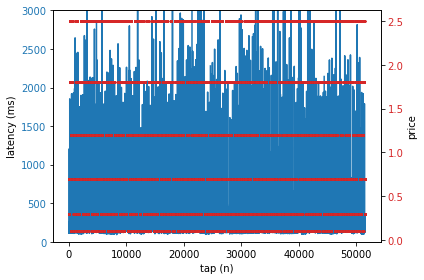

In [86]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(low_tap, low_latency, color=color)
ax1.set_ylim([0,3000])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(low_tap, low_price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [87]:
#high environment
high_price = data_fish_h['price_displayed']
high_tap = np.arange(1, len(data_fish_h['price_displayed'])+1)
high_latency = data_fish_h['latency']

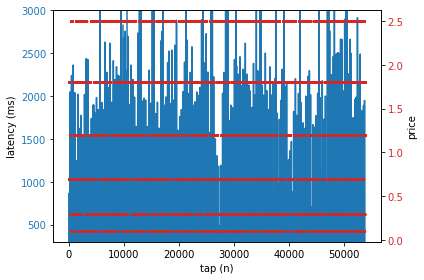

In [88]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(high_tap, high_latency, color=color)
ax1.set_ylim([300,3000])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(high_tap, high_price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [97]:
data = data_raw[data_raw['latency']<300]  
data['latency'].describe()


count   100589.000
mean       173.530
std         33.077
min         93.000
25%        151.000
50%        170.000
75%        192.000
max        299.000
Name: latency, dtype: float64

In [90]:
#104305-104122

In [91]:
#data['latency'].describe() # dropped 183 data points

In [98]:
bonus = data.groupby(["Participant Public ID","price_displayed", "function_id"]).size()
bonus = bonus.reset_index()
bonus.columns = ['Participant Public ID', 'price_displayed', 'factor', 'tap']
bonus = bonus.replace('fishing_h', 4/3000)
bonus = bonus.replace('fishing_l', 0.5/3000)
bonus = bonus.round(20)
bonus['earning'] = bonus['price_displayed']*bonus['factor']*bonus['tap']
pay = bonus.groupby(['Participant Public ID'])['earning'].sum().reset_index()
pay['earning'] = np.ceil(pay['earning'])
pay['prolific'] = [','.join(i) for i in zip(pay["Participant Public ID"].map(str),pay["earning"].astype(str))]
pay
pay.to_csv('prolific_bonus.csv', sep = ',', encoding='utf-8')



In [92]:
graph = data.groupby(["price_displayed", "function_id"])['latency'].mean().reset_index()
graph.columns = ['price_displayed', 'function_id', 'average_latency']
graph


price_displayed function_id  average_latency
0             0.100   fishing_h          179.013
1             0.100   fishing_l          188.229
2             0.300   fishing_h          175.978
3             0.300   fishing_l          183.010
4             0.700   fishing_h          173.245
5             0.700   fishing_l          179.631
6             1.200   fishing_h          167.764
7             1.200   fishing_l          173.294
8             1.800   fishing_h          167.248
9             1.800   fishing_l          170.501
10            2.500   fishing_h          163.127
11            2.500   fishing_l          166.851

In [93]:
m = pd.pivot_table(graph, index = 'function_id', columns = 'price_displayed', values = 'average_latency')
m.head(100)

price_displayed   0.100   0.300   0.700   1.200   1.800   2.500
function_id                                                    
fishing_h       179.013 175.978 173.245 167.764 167.248 163.127
fishing_l       188.229 183.010 179.631 173.294 170.501 166.851

In [94]:
m.iloc[m.index.get_level_values('function_id') == 'fishing_h']

price_displayed   0.100   0.300   0.700   1.200   1.800   2.500
function_id                                                    
fishing_h       179.013 175.978 173.245 167.764 167.248 163.127

In [95]:
price = [0.1, 0.3, 0.7, 1.2, 1.8, 2.5]
latency_l = [188.304, 182.879, 178.578, 172.749, 170.919, 166.087]
latency_h = [179.013, 175.978, 173.245, 167.764, 167.248, 163.127]

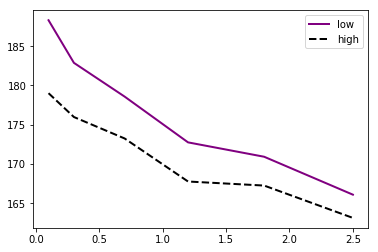

In [96]:
plt.plot( price, latency_l, marker='', color='purple', linewidth=2, label = "low")
plt.plot( price, latency_h, marker='', color='black', linewidth=2, linestyle='dashed', label="high")
plt.legend()
#look at low-high and high-low for transition period
#understand the variance within the data and think about if the variables in the model can explain them

In [ ]:
# do a quick check for sound
sound = pd.read_csv('data_exp_6138-v31_task-jgum.csv', sep = ",")
sound = sound.replace('null', np.nan)
sound = sound.replace('nan', np.nan)
#sound.head(40)

In [ ]:
sound['button pressed'].dropna()
correct = [1, 0, 0]* 32

In [ ]:
sound['button pressed'].dropna() == correct

In [98]:
data.to_csv("pilot35.csv", sep=',', encoding='utf-8')

In [ ]:
# import AMI
AMI = pd.read_csv('data_exp_6138-v31_task-lgcm.csv', sep = ",")
AMI

In [ ]:
#get rid of the last line - does not contain any infomraiton
#AMI = AMI[:-1]
#AMI.head(100)

In [ ]:
#AMI["choice made"]

In [ ]:
AMI_group = AMI.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
response = AMI_group['choice made'][0]
AMI_group.head(10)

In [ ]:
#response = AMI_group['choice made'][0]
#d['hi'] = d.pop('hii')
#response[0] = json.loads(response[0])
#response[0]['Q1'] = response[0]['Q0']
#del response[0]['Q0']
#print (response)

In [ ]:
def extract_choice(ser):
    choice = []
    for s in ser:
        c = 0
        while c < len(s):
            r = json.loads(s[c])
            for key in r.keys():
                choice.append(r[key])
            c = c + 1
    return choice

In [ ]:
#len(extract_choice(AMI_group['choice made']))

In [ ]:
choice = extract_choice(AMI_group['choice made'])
# comment the next line off so you dont repeat the command multiple times
#AMI_group = AMI_group.loc[AMI_group.index.repeat(18)]
len(AMI_group)

In [ ]:
AMI_group['choice'] = choice

In [ ]:
AMI_group['question_number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]*32

In [ ]:
AMI_group.head(10)

In [ ]:
AMI_group.choice[AMI_group.choice == "Completely UNTRUE"] = 4
AMI_group.choice[AMI_group.choice == "Mostly untrue"] = 3
AMI_group.choice[AMI_group.choice == "Neither true nor untrue"] = 2
AMI_group.choice[AMI_group.choice == "Quite true"] = 1
AMI_group.choice[AMI_group.choice == "Completely TRUE"] = 0

In [ ]:
# bAMI = questions [5 9 10 11 12 15]
# sAMI = questions [2 3 4  8  14 17]
# eAMI = questions [1 6 7  13 16 18]
# tAMI = sum
bAMI = AMI_group[(AMI_group.question_number == 5)|(AMI_group.question_number == 9)|(AMI_group.question_number == 10)|(AMI_group.question_number == 11)|(AMI_group.question_number == 12)|(AMI_group.question_number == 15)]
sAMI = AMI_group[(AMI_group.question_number == 2)|(AMI_group.question_number == 3)|(AMI_group.question_number == 4)|(AMI_group.question_number == 8)|(AMI_group.question_number == 14)|(AMI_group.question_number == 17)]
eAMI = AMI_group[(AMI_group.question_number == 1)|(AMI_group.question_number == 6)|(AMI_group.question_number == 7)|(AMI_group.question_number == 13)|(AMI_group.question_number == 16)|(AMI_group.question_number == 18)]
bAMI = bAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
bAMI.columns = ['id', 'bAMI']
sAMI = sAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
sAMI.columns = ['id', 'sAMI']
eAMI = eAMI.groupby(['Participant Private ID'])['choice'].sum().reset_index()
eAMI.columns = ['id', 'eAMI']
AMI_final = {'id': bAMI['id'], 'bAMI': bAMI['bAMI'], 'sAMI': sAMI['sAMI'], 'eAMI': eAMI['eAMI']}
AMI_final = pd.DataFrame(data=AMI_final)
AMI_final['tAMI'] = bAMI['bAMI'] + sAMI['sAMI'] + eAMI['eAMI']
AMI_final

In [ ]:
AMI_final.to_csv('AMI35.csv', sep=',', encoding='utf-8')

In [ ]:
plt.scatter(AMI_final.index.tolist(), AMI_final['tAMI'], color='purple')
plt.legend()
#look at and interpret each data point
#find examplar subjects and understand their behavior

In [ ]:
# import HAD
HAD = pd.read_csv('data_exp_6138-v31_task-w8es.csv', sep = ",")
HAD.head(5)

In [ ]:
HAD_group = HAD.groupby(["Participant Private ID"])['choice made'].apply(list).reset_index()
HAD_group.head(10)

In [ ]:
choice = extract_choice(HAD_group['choice made'])
# comment the next line off so you dont repeat the command multiple times
#HAD_group = HAD_group.loc[HAD_group.index.repeat(14)]



In [ ]:
HAD_group['choice'] = choice
HAD_group['question_number'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]*32

In [ ]:
HAD_group['scale'] = [{"Most of the time" : 3, "A lot of the time": 2, "From time to time, occasionally" : 1, "Not at all":0},
                      {"Nearly all the time": 3, "Very often": 2, "Sometimes": 1, "Not at all":0},
                      {"Definitely as much":0, "Not quite so much":1, "Only a little":2, "Hardly at all":3},
                      {"Not at all":0, "Occasionally":1, "Quite Often":2, "Very Often":3},
                      {"Very definitely and quite badly":3, "Yes, but not too badly":2, "A little, but it doesn't worry me":1, "Not at all":0},
                      {"Definitely":3, "I don't take as much care as I should":2,"I may not take quite as much care":1, "I take just as much care as ever":0},
                      {"As much as I always could":0, "Not quite so much now":1, "Definitely not so much now":2, "Not at all":3},
                      {"Very much indeed":3, "Quite a lot":2,"Not very much":1, "Not at all":0},
                      {"A great deal of the time":3, "A lot of the time":2, "From time to time, but not too often":1,"Only occasionally":0},
                      {"As much as I ever did":0, "Rather less than I used to":1, "Definitely less than I used to":2, "Hardly at all":3},
                      {"Not at all":3, "Not often":2,"Sometimes":1, "Most of the time":0},
                      {"Very often indeed":3, "Quite often":2,"Not very often":1, "Not at all":0},
                      {"Definitely":0, "Usually":1, "Not Often":2,"Not at all":3},
                      {"Often":0, "Sometimes":1,"Not often":2, "Very seldom":3}]*32

In [ ]:
# 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
# A, D, D, A, A, D, D, A, A, D,   D,  A,  A, D

# anxiety =  [1, 4, 5, 8, 9, 12, 13]
# depression = [2, 3, 6, 7, 10, 11, 14]
depression = HAD_group[(HAD_group.question_number == 2)|(HAD_group.question_number == 3)|(HAD_group.question_number == 6)|(HAD_group.question_number == 7)|(HAD_group.question_number == 10)|(HAD_group.question_number == 11)|(HAD_group.question_number == 14)]
anxiety = HAD_group[(HAD_group.question_number == 1)|(HAD_group.question_number == 4)|(HAD_group.question_number == 5)|(HAD_group.question_number == 8)|(HAD_group.question_number == 9)|(HAD_group.question_number == 12)|(HAD_group.question_number == 13)]

value = []
for index, row in HAD_group.iterrows():
    d = row["scale"]
    k = row['choice']
    value.append(d[k])
HAD_group['value'] = value



In [ ]:
depression = depression.groupby(['Participant Private ID'])['value'].sum().reset_index()
depression.columns = ['id', 'depression']
anxiety = anxiety.groupby(['Participant Private ID'])['value'].sum().reset_index()
anxiety.columns = ['id', 'anxiety']
HAD_group.head(5)

In [ ]:
HAD_final = {'id': anxiety['id'], 'anxiety': anxiety['anxiety'], 'depression': depression['depression']}
HAD_final = pd.DataFrame(data=HAD_final)
HAD_final['tHAD'] = anxiety['anxiety'] + depression['depression']

HAD_final.to_csv('HAD_pilot35.csv', sep = ',', encoding='utf-8')
HAD_final.head(10)

In [ ]:

AMI_group.choice[AMI_group.choice == "Completely UNTRUE"] = 4
AMI_group.choice[AMI_group.choice == "Mostly untrue"] = 3
AMI_group.choice[AMI_group.choice == "Neither true nor untrue"] = 2
AMI_group.choice[AMI_group.choice == "Quite true"] = 1
AMI_group.choice[AMI_group.choice == "Completely TRUE"] = 0

In [ ]:
demographics = pd.read_csv('data_exp_6138-v31_questionnaire-zk38.csv', sep = ",")
demographics.head(15)
# we asked them 7 questions in total




In [ ]:
demographics = demographics[demographics['Question Key'] != 'BEGIN QUESTIONNAIRE']
demographics = demographics[demographics['Question Key'] != 'END QUESTIONNAIRE']
demographics['id'] = demographics['Participant Private ID']
demographics['question'] = demographics['Question Key']
demographics['response'] = demographics['Response']
demographics = demographics[['id', 'question', 'response']]
demographics.head(33)



In [ ]:
demographics.to_csv('demographics.csv', sep = ',', encoding='utf-8')

In [ ]:
#artifact in second tap of rod fixing & NaNs - send Akshay Pesudo code
#age limit: 25 - 65
#the payment strucutre - decrease hourly rate and keep the bonus the same